In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from matplotlib import pyplot


In [25]:
cid = 4436
df = pd.read_csv("../Features/" + str(cid) + "/priority2_month.csv")
df2 = pd.read_csv("../Features/" + str(cid) + "/feature_month.csv")
df.tail(5)

,Unnamed: 0,date,current_ratio,debt_to_asset_ratio,acid_test,net_profit_margin
110,110,2021-02-28,0.944756,1.213115,0.818218,-2.408868
111,111,2021-03-31,0.781696,1.482075,0.478314,-1.528909
112,112,2021-04-30,0.682183,1.710055,0.453851,-1.508943
113,113,2021-06-30,0.590121,2.006459,0.426263,-0.984122
114,114,2021-07-31,0.585377,1.954319,0.345969,-1.047358


In [26]:
df["date"] = df["date"].apply(lambda x: int(x.replace("-", "")))

In [27]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

In [28]:
df = df.round(3)

In [31]:
sir = ['Unnamed: 0']
df = df.drop(sir, axis=1)

In [32]:
df

,date,current_ratio,debt_to_asset_ratio,acid_test,net_profit_margin
0,20120930,0.000,0.000,0.000,0.000
1,20121031,0.000,0.000,0.000,0.000
2,20121130,0.000,0.000,0.000,0.000
3,20121231,0.000,0.000,0.000,0.000
4,20130131,0.000,0.000,0.000,0.000
...,...,...,...,...,...
110,20210228,0.945,1.213,0.818,-2.409
111,20210331,0.782,1.482,0.478,-1.529
112,20210430,0.682,1.710,0.454,-1.509
113,20210630,0.590,2.006,0.426,-0.984


In [33]:
from sklearn.preprocessing import StandardScaler
df=(df-df.mean())/df.std()

X = df
y = df2.pop('net_revenue')

In [34]:
df

,date,current_ratio,debt_to_asset_ratio,acid_test,net_profit_margin
0,-1.853971,-0.824702,-0.643445,-0.633378,0.372861
1,-1.849933,-0.824702,-0.643445,-0.633378,0.372861
2,-1.845974,-0.824702,-0.643445,-0.633378,0.372861
3,-1.841935,-0.824702,-0.643445,-0.633378,0.372861
4,-1.486051,-0.824702,-0.643445,-0.633378,0.372861
...,...,...,...,...,...
110,1.716788,0.397139,-0.410795,0.575130,-0.356010
111,1.720907,0.186388,-0.359202,0.072816,-0.089756
112,1.724866,0.057092,-0.315472,0.037359,-0.083704
113,1.732863,-0.061859,-0.258700,-0.004008,0.075140


In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
count = 0
for i,v in enumerate(importance):
	print('Feature:' + str(X.columns[count]) + ', Score: ' + str(v))
	count += 1
# plot feature importance

# pyplot.bar([x for x in range(len(importance))], importance)


Feature:date, Score: -17287.464951797225
Feature:current_ratio, Score: 208581.12565488176
Feature:debt_to_asset_ratio, Score: 16312.109457720275
Feature:acid_test, Score: -192113.62348738222
Feature:net_profit_margin, Score: 6868.914702308105


<AxesSubplot:>

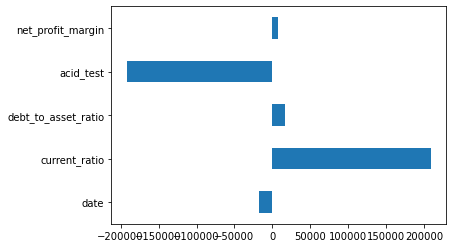

In [38]:
(pd.Series(model.coef_, index=X.columns)
   .plot(kind='barh'))   

In [42]:
customer0 = 4436
customer1 = 4522
customer2 = 4704
customer3 = 6374
list_of_customers = [4436, 4522, 4704, 6374]

In [50]:
def feature_importance(cid):
    df = pd.read_csv("../Features/" + str(cid) + "/priority2_month.csv")
    df2 = pd.read_csv("../Features/" + str(cid) + "/feature_month.csv")
    
    df["date"] = df["date"].apply(lambda x: int(x.replace("-", "")))
    
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df = df.fillna(0)
    
    df = df.round(3)
    
    sir = ['Unnamed: 0']
    df = df.drop(sir, axis=1)
    
    df=(df-df.mean())/df.std()
    
    df = df.fillna(0)

    X = df
    y = df2.pop('net_revenue')
    
    model = LinearRegression()
    model.fit(X, y)
    
    importance = model.coef_
    
    count = 0
    print(f"Company : {cid}")
    
    for i,v in enumerate(importance):
        print(f'Feature: ' + str(X.columns[count]) + ', Score: ' + str(v))
        count += 1
    
    return importance, X

Company : 4436
Feature: date, Score: -17287.464951797225
Feature: current_ratio, Score: 208581.12565488176
Feature: debt_to_asset_ratio, Score: 16312.109457720275
Feature: acid_test, Score: -192113.62348738222
Feature: net_profit_margin, Score: 6868.914702308105


<AxesSubplot:title={'center':'Company 4436 Features'}>

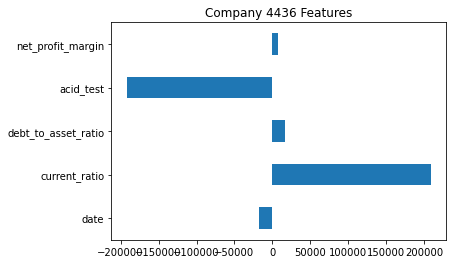

In [57]:
importance, X = feature_importance(customer0)

(pd.Series(importance, index=X.columns)
   .plot(kind='barh', title='Company 4436 Features'))  

Company : 4522
Feature: date, Score: -19255.501381527964
Feature: current_ratio, Score: 142441.04919541
Feature: debt_to_asset_ratio, Score: -35088.91244710984
Feature: acid_test, Score: 0.0
Feature: net_profit_margin, Score: 0.0


<AxesSubplot:title={'center':'Company 4522 Features'}>

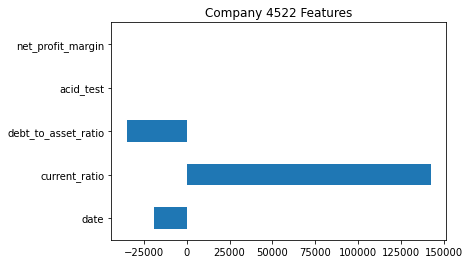

In [56]:
importance, X = feature_importance(customer1)

(pd.Series(importance, index=X.columns)
   .plot(kind='barh', title='Company 4522 Features'))    

Company : 4704
Feature: date, Score: 0.0
Feature: current_ratio, Score: 0.0
Feature: debt_to_asset_ratio, Score: 0.0
Feature: acid_test, Score: 0.0
Feature: net_profit_margin, Score: 0.0


<AxesSubplot:title={'center':'Company 4522 Features'}>

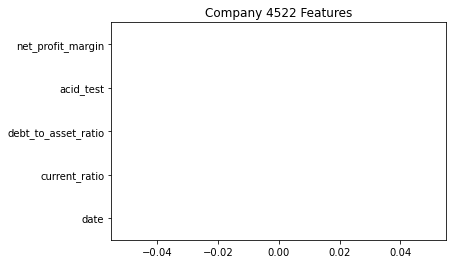

In [59]:
importance, X = feature_importance(customer2)

(pd.Series(importance, index=X.columns)
   .plot(kind='barh', title='Company 4522 Features'))    

Company : 4522
Feature: date, Score: -19255.501381527964
Feature: current_ratio, Score: 142441.04919541
Feature: debt_to_asset_ratio, Score: -35088.91244710984
Feature: acid_test, Score: 0.0
Feature: net_profit_margin, Score: 0.0


<AxesSubplot:title={'center':'Company 4522 Features'}>

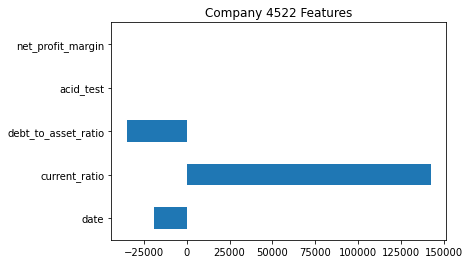

In [61]:
importance, X = feature_importance(customer1)

(pd.Series(importance, index=X.columns)
   .plot(kind='barh', title='Company 4522 Features'))    

In [49]:
df

,date,current_ratio,debt_to_asset_ratio,acid_test,net_profit_margin
0,-1.842302,-0.289109,-1.023504,NaN,NaN
1,-1.838001,-0.289109,-1.023504,NaN,NaN
2,-1.459035,-0.289109,-1.023504,NaN,NaN
3,-1.454905,-0.289109,-1.023504,NaN,NaN
4,-1.450519,-0.289109,-1.023504,NaN,NaN
...,...,...,...,...,...
92,1.547142,-0.188330,0.451916,NaN,NaN
93,1.551400,-0.173920,0.267885,NaN,NaN
94,1.555615,-0.154769,0.085441,NaN,NaN
95,1.559916,-0.207766,0.797767,NaN,NaN
